In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits
import healpy as hp
from astropy import wcs

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
ccdnamenumdict = {'S1': 25, 'S2': 26, 'S3': 27, 'S4':28,
                  'S5': 29, 'S6': 30, 'S7': 31,
                  'S8': 19, 'S9': 20, 'S10': 21, 'S11': 22, 'S12': 23,
                  'S13': 24,
                  'S14': 13, 'S15': 14, 'S16': 15, 'S17': 16, 'S18': 17,
                  'S19': 18,
                  'S20': 8, 'S21': 9, 'S22': 10, 'S23': 11, 'S24': 12,
                  'S25': 4, 'S26': 5, 'S27': 6, 'S28': 7,
                  'S29': 1, 'S30': 2, 'S31': 3,
                  'N1': 32, 'N2': 33, 'N3': 34, 'N4': 35,
                  'N5': 36, 'N6': 37, 'N7': 38,
                  'N8': 39, 'N9': 40, 'N10': 41, 'N11': 42, 'N12': 43,
                  'N13': 44,
                  'N14': 45, 'N15': 46, 'N16': 47, 'N17': 48, 'N18': 49,
                  'N19': 50,
                  'N20': 51, 'N21': 52, 'N22': 53, 'N23': 54, 'N24': 55,
                  'N25': 56, 'N26': 57, 'N27': 58, 'N28': 59,
                  'N29': 60, 'N30': 61, 'N31': 62,
                  }

fringe_dir = '/global/homes/d/djschleg/cosmo/staging/decam/DECam_CP-Fringe'
image_dir = '/global/project/projectdirs/cosmo/staging/'
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-decam-dr9-cut.fits.gz'

In [4]:
# ccd_columns = ['image_filename', 'image_hdu', 'camera', 'expnum', 'ccdname', 'filter', 'fwhm', 'ra', 'dec', 'ccd_cuts', 'ccdzpt', 'exptime', 'ccdraoff', 'ccddecoff']
# ccd = fitsio.read(surveyccd_path, columns=ccd_columns)
ccd = fitsio.read(surveyccd_path)
ccd = Table(ccd)
mask = ccd['ccd_cuts']==0
mask &= ccd['filter']=='z'
ccd = ccd[mask]
print(len(ccd))

2008917


1004458


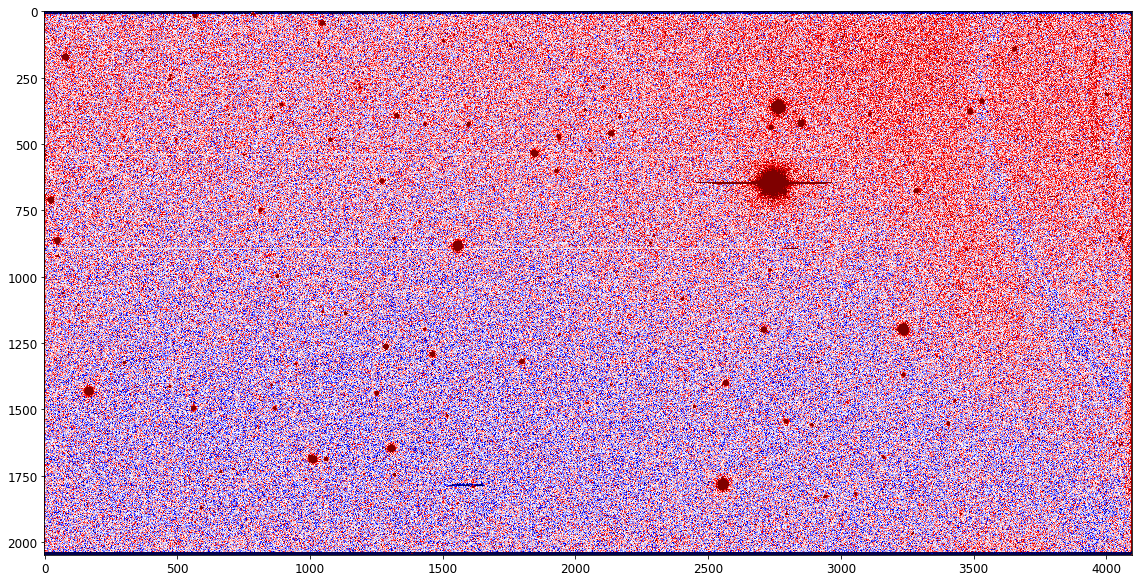

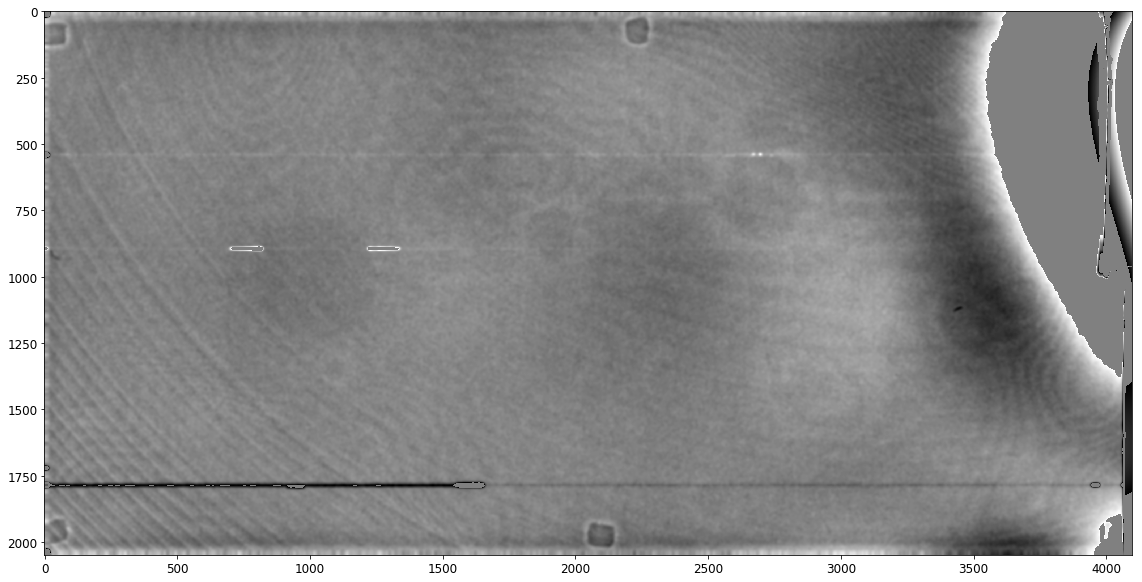

In [28]:
####################### Load CCD image #######################
# ccd_index = 0
ccd_index = len(ccd)//2
print(ccd_index)

img_fn = os.path.join(image_dir, ccd['image_filename'][ccd_index]).strip()
hdulist = fits.open(img_fn)
img = hdulist[ccd['image_hdu'][ccd_index]].data
frgscale = (hdulist[ccd['image_hdu'][ccd_index]].header)['FRGSCALE']

# naive sky estimation
mask = (img<np.percentile(img.flatten(), 85))
sky = np.median(img[mask].flatten())
vrange = 2*(sky - np.percentile(img.flatten(), 0.5))

# # pad the edges with zeros to match the fringe image dimension
# img = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)

plt.figure(figsize=(20, 10))
plt.imshow(img.T, cmap='seismic', vmin=sky-vrange, vmax=sky+vrange)
plt.show()

####################### Load fringe image #######################
print(frgscale)
ccdnum = str(ccdnamenumdict[ccd[ccd_index]['ccdname'].strip()]).zfill(2)
fringe_path = os.path.join(fringe_dir, 'DES17B_20180103_908c062-z-{}_frg.fits'.format(ccdnum))
# fringe_path = os.path.join(fringe_dir, (hdulist[ccd['image_hdu'][ccd_index]].header)['FRINGE']+'.fits')
fringe = fits.getdata(fringe_path)
# remove the edge pixels
fringe = fringe[1:4095, 1:2047]

plt.figure(figsize=(20, 10))
plt.imshow(fringe.T, cmap='gray')
plt.show()

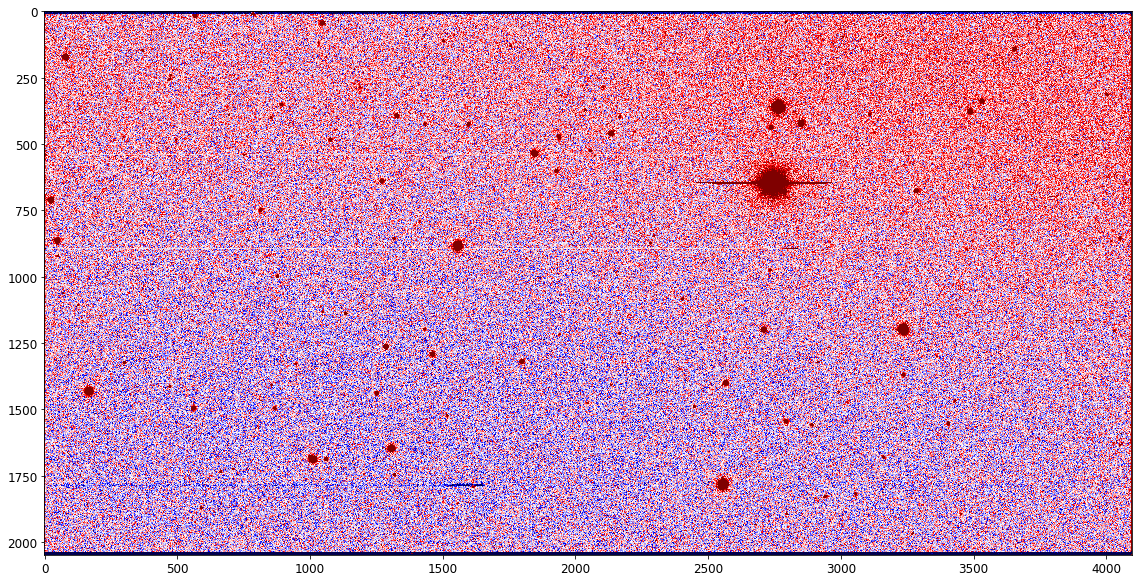

In [29]:
img_orig = img + fringe*frgscale

plt.figure(figsize=(20, 10))
plt.imshow(img_orig.T, cmap='seismic', vmin=sky-vrange, vmax=sky+vrange)
plt.show()